# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|...|...|...|
|...|...|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [59]:
# Libraries
import os
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [60]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id')

## Data Overview

In [61]:
submission = pd.read_csv('sample_submission.csv')
display(submission)

id  stroke
0     32840       1
1     45158       0
2     56105       1
3      3112       0
4     35224       1
...     ...     ...
8383  60672       0
8384  25989       0
8385  34072       1
8386  32400       0
8387  53144       0

[8388 rows x 2 columns]

In [62]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
id                                                                              
1   80.0             0              1              67.45  25.6           True   
7   44.0             0              0             222.75  19.6           True   
8   79.0             0              0              99.23  25.1           True   
9   44.0             0              0             125.44  35.5          False   
10  34.0             0              0              89.11  28.0           True   
20  36.0             0              0              89.79  27.3          False   
22   5.0             0              0             100.81  20.6          False   
23  68.0             0              0              75.91  21.8           True   
24  72.0             0              1             113.65  27.4           True   
29  44.0             1              0             117.10  26.9          False   

    gender_Male  gender_Other  ever_married_No  ever_married_Yes  \
id                                                                 
1         False         False            False              True   
7         False         False            False              True   
8         False         False            False              True   
9          True         False            False              True   
10        False         False            False              True   
20         True         False            False              True   
22         True         False             True             False   
23        False         False            False              True   
24        False         False            False              True   
29         True         False            False              True   

    work_type_Govt_job  work_type_Never_worked  work_type_Private  \
id                                                                  
1                False                   False              False   
7                False                   False               True   
8                False                   False               True   
9                False                   False               True   
10               False                   False               True   
20                True                   False              False   
22               False                   False              False   
23               False                   False               True   
24               False                   False              False   
29               False                   False               True   

    work_type_Self-employed  work_type_children  Residence_type_Rural  \
id                                                                      
1                      True               False                 False   
7                     False               False                 False   
8                     False               False                 False   
9                     False               False                  True   
10                    False               False                 False   
20                    False               False                 False   
22                    False                True                  True   
23                    False               False                  True   
24                     True               False                  True   
29                    False               False                  True   

    Residence_type_Urban  smoking_status_formerly smoked  \
id                                                         
1                   True                           False   
7                   True                           False   
8                   True                           False   
9                  False                           False   
10                  True                           False   
20                  True                           False   
22                 False     

Test Data


age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
33344  43.0             0              1              96.93  29.6   
35699  16.0             0              0              82.25  30.9   
48440  38.0             0              0              78.90  25.3   
32256  23.0             0              0              72.60  31.2   
18285   6.0             0              0              95.45  17.0   

       gender_Female  gender_Male  gender_Other  ever_married_No  \
id                                                                 
32840           True        False         False            False   
45158           True        False         False            False   
56105           True        False         False            False   
3112            True        False         False            False   
35224           True        False         False            False   
33344          False         True         False            False   
35699           True        False         False             True   
48440           True        False         False             True   
32256           True        False         False             True   
18285           True        False         False             True   

       ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
id                                                                    
32840              True               False                   False   
45158              True               False                   False   
56105              True               False                   False   
3112               True               False                   False   
35224              True               False                   False   
33344              True               False                   False   
35699             False               False                   False   
48440             False                True                   False   
32256             False               False                   False   
18285             False               False                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                      
32840               True                    False               False   
45158               True                    False               False   
56105               True                    False               False   
3112                True                    False               False   
35224               True                    False               False   
33344              False                     True               False   
35699               True                    False               False   
48440              False                    False               False   
32256               True                    False               False   
18285              False                    False                True   

       Residence_type_Rural  Residence_type_Urban  \
id                                                  
32840                 False                  True   
45158                 False                  True   
56105                 False                  True   
3112                  False                  True   
35224                 False                  True   
33344                 False                  True   
35699                  True                 False   
48440                  True                 False   
32256                  True                 False   
18285                  True                 False

## Exploratory Data Analysis

In [63]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               33550

None

In [64]:
train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke'],
      dtype='object')

In [65]:
train.duplicated().sum() # check for duplicated rows

0

In [66]:
train.isnull().sum() # check for missing values

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64

In [67]:
train.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  33550.000000  33550.000000   33550.000000       33550.000000   
mean      41.815312      0.088137       0.043040         103.587081   
std       22.477423      0.283498       0.202951          42.127396   
min        0.080000      0.000000       0.000000          55.010000   
25%       24.000000      0.000000       0.000000          77.460000   
50%       43.000000      0.000000       0.000000          91.320000   
75%       59.000000      0.000000       0.000000         111.437500   
max       82.000000      1.000000       1.000000         281.590000   

                bmi        stroke  
count  33550.000000  33550.000000  
mean      28.601216      0.015410  
std        7.782248      0.123178  
min       10.100000      0.000000  
25%       23.300000      0.000000  
50%       27.700000      0.000000  
75%       32.800000      0.000000  
max       97.600000      1.000000

In [68]:
train['hypertension'].value_counts()

hypertension
0    30593
1     2957
Name: count, dtype: int64

In [69]:
train['heart_disease'].value_counts()

heart_disease
0    32106
1     1444
Name: count, dtype: int64

In [70]:
train['gender_Female'].value_counts()

gender_Female
True     20032
False    13518
Name: count, dtype: int64

In [71]:
train['gender_Other'].value_counts()

gender_Other
False    33544
True         6
Name: count, dtype: int64

In [72]:
train['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

In [73]:
def fusion(df, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [74]:
train = fusion(train, mappings)

In [75]:
train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke', 'gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status'],
      dtype='object')

In [76]:
train = train[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married', 'work_type', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children','residence_type','smoking_status','stroke']]
# train = train[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status','stroke']]
train.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                       
1   80.0             0              1              67.45  25.6  Female   
7   44.0             0              0             222.75  19.6  Female   
8   79.0             0              0              99.23  25.1  Female   
9   44.0             0              0             125.44  35.5    Male   
10  34.0             0              0              89.11  28.0  Female   
20  36.0             0              0              89.79  27.3    Male   
22   5.0             0              0             100.81  20.6    Male   
23  68.0             0              0              75.91  21.8  Female   
24  72.0             0              1             113.65  27.4  Female   
29  44.0             1              0             117.10  26.9    Male   

   ever_married      work_type  work_type_Govt_job  work_type_Never_worked  \
id                                                                           
1           Yes  self-employed               False                   False   
7           Yes        private               False                   False   
8           Yes        private               False                   False   
9           Yes        private               False                   False   
10          Yes        private               False                   False   
20          Yes       govt_job                True                   False   
22           No       children               False                   False   
23          Yes        private               False                   False   
24          Yes  self-employed               False                   False   
29          Yes        private               False                   False   

    work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                   
1               False                     True               False   
7                True                    False               False   
8                True                    False               False   
9                True                    False               False   
10               True                    False               False   
20              False                    False               False   
22              False                    False                True   
23               True                    False               False   
24              False                     True               False   
29               True                    False               False   

   residence_type   smoking_status  stroke  
id                                          
1           Urban     never smoked       0  
7           Urban     never smoked       0  
8           Urban  formerly smoked       0  
9           Rural     never smoked       0  
10          Urban     never smoked       0  
20          Urban           smokes       0  
22          Rural  formerly smoked       0  
23          Rural     never smoked       0  
24          Rural  formerly smoked       0  
29          Rural     never smoked       0

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      33550 non-null  float64
 1   hypertension             33550 non-null  int64  
 2   heart_disease            33550 non-null  int64  
 3   avg_glucose_level        33550 non-null  float64
 4   bmi                      33550 non-null  float64
 5   gender                   33550 non-null  object 
 6   ever_married             33550 non-null  object 
 7   work_type                33550 non-null  object 
 8   work_type_Govt_job       33550 non-null  bool   
 9   work_type_Never_worked   33550 non-null  bool   
 10  work_type_Private        33550 non-null  bool   
 11  work_type_Self-employed  33550 non-null  bool   
 12  work_type_children       33550 non-null  bool   
 13  residence_type           33550 non-null  object 
 14  smoking_status           33

In [78]:
cat_col = train.select_dtypes(include='object').columns
print(cat_col)

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


In [79]:
for col in cat_col:
    fig = px.histogram(train, x=col, color='stroke')
    fig.show()

In [80]:
for col in cat_col:
    count_series = train[col].value_counts()
    count_df = count_series.reset_index()
    count_df.columns = [col, 'count']
    
    fig = px.pie(count_df, names=col, values='count', title=f'Pie chart of {col}')
    fig.show()

In [81]:
num_col =train.select_dtypes(exclude=['object','bool']).columns.drop('stroke')

In [82]:
for col in num_col:
    fig = px.box(train, x=col, color='stroke')
    fig.show()

Average Glucose Level:
- Normal: 70-140
- Prediabetes: 141-200
- Diabetes: 200+

https://www.youtube.com/watch?v=f6mGx8Uc_jk

BMI:
- Underweight: <18.5
- Optimum range: 18.5-24.9
- Overweight: 25-29.9
- Class 1 obesity: 30-34.9
- Class 2 obesity: 35-39.9
- Class 3 obesity: 40+

https://my.clevelandclinic.org/health/articles/9464-body-mass-index-bmi


In [83]:
# def glucose_level(x):
#     if x < 70:
#         return 'low'
#     elif x <= 140:
#         return 'normal'
#     elif x <= 200:
#         return 'high'
#     else:
#         return 'very high'
    
# def bmi_range(x):
#     if x < 18.5:
#         return 'underweight'
#     elif x < 25:
#         return 'normal'
#     elif x < 30:
#         return 'overweight'
#     elif x < 35:
#         return 'class 1 obesity'
#     elif x < 40:
#         return 'class 2 obesity'
#     else:
#         return 'class 3 obesity'
    
# train['avg_glucose_level'] = train['avg_glucose_level'].apply(glucose_level)
# train['bmi'] = train['bmi'].apply(bmi_range)

In [84]:
# glucose_mapping = {'low': 0,
#                    'normal': 1,
#                    'high': 2,
#                    'very high': 3}

# bmi_mapping = {'underweight': 0,
#                'normal': 1,
#                'overweight': 2,
#                'class 1 obesity': 3,
#                'class 2 obesity': 4,
#                'class 3 obesity': 5}

# train['avg_glucose_level_encoded'] = train['avg_glucose_level'].map(glucose_mapping)
# train['bmi_encoded'] = train['bmi'].map(bmi_mapping)

# print(glucose_mapping, bmi_mapping)

# display(train.head(10))

In [85]:
# test['avg_glucose_level'] = test['avg_glucose_level'].apply(glucose_level)
# test['bmi'] = test['bmi'].apply(bmi_range)
# test['avg_glucose_level_encoded'] = test['avg_glucose_level'].map(glucose_mapping)
# test['bmi_encoded'] = test['bmi'].map(bmi_mapping)

In [86]:
train

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                          
1      80.0             0              1              67.45  25.6  Female   
7      44.0             0              0             222.75  19.6  Female   
8      79.0             0              0              99.23  25.1  Female   
9      44.0             0              0             125.44  35.5    Male   
10     34.0             0              0              89.11  28.0  Female   
...     ...           ...            ...                ...   ...     ...   
72938  40.0             0              0             132.52  40.1  Female   
72939  34.0             0              0              82.72  26.3  Female   
72940   2.0             0              0             102.92  17.6  Female   
72941  68.0             0              0             149.38  27.3    Male   
72943  59.0             0              0              55.29  23.7  Female   

      ever_married      work_type  work_type_Govt_job  work_type_Never_worked  \
id                                                                              
1              Yes  self-employed               False                   False   
7              Yes        private               False                   False   
8              Yes        private               False                   False   
9              Yes        private               False                   False   
10             Yes        private               False                   False   
...            ...            ...                 ...                     ...   
72938          Yes        private               False                   False   
72939           No        private               False                   False   
72940           No       children               False                   False   
72941          Yes  self-employed               False                   False   
72943          Yes        private               False                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                      
1                  False                     True               False   
7                   True                    False               False   
8                   True                    False               False   
9                   True                    False               False   
10                  True                    False               False   
...                  ...                      ...                 ...   
72938               True                    False               False   
72939               True                    False               False   
72940              False                    False                True   
72941              False                     True               False   
72943               True                    False               False   

      residence_type   smoking_status  stroke  
id                                             
1              Urban     never smoked       0  
7              Urban     never smoked       0  
8              Urban  formerly smoked       0  
9              Rural     never smoked       0  
10             Urban     never smoked       0  
...              ...              ...     ...  
72938          Rural     never smoked       0  
72939          Urban  formerly smoked       0  
72940          Urban  formerly smoked       0  
72941          Urban  formerly smoked       0  
72943          Urban           smokes       0  

[33550 rows x 16 columns]

In [87]:
TRAIN = train.drop('work_type', axis=1)

In [90]:
test = fusion(test, mappings)

# test = test[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status']]

test = test[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children','residence_type','smoking_status']]

In [91]:
# TRAIN = train.copy()
TEST = test.copy()

In [92]:
cols = TEST.select_dtypes(include=['object','bool']).columns
for col in cols:
    encoder = LabelEncoder()
    TRAIN[col] = encoder.fit_transform(train[col])
    TEST[col] = encoder.transform(test[col])
    print(f'{col} Labels:', encoder.classes_)


gender Labels: ['Female' 'Male' 'Other']
ever_married Labels: ['No' 'Yes']
work_type_Govt_job Labels: [False  True]
work_type_Never_worked Labels: [False  True]
work_type_Private Labels: [False  True]
work_type_Self-employed Labels: [False  True]
work_type_children Labels: [False  True]
residence_type Labels: ['Rural' 'Urban']
smoking_status Labels: ['formerly smoked' 'never smoked' 'smokes']


In [93]:
float_cols = train.select_dtypes('float64').columns
scaler = MinMaxScaler()
TRAIN[float_cols] = scaler.fit_transform(train[float_cols])
TEST[float_cols] = scaler.transform(test[float_cols])

In [94]:
TRAIN.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                       
1   0.975586             0              1           0.054903  0.177143   
7   0.536133             0              0           0.740312  0.108571   
8   0.963379             0              0           0.195163  0.171429   
9   0.536133             0              0           0.310839  0.290286   
10  0.414062             0              0           0.150499  0.204571   
20  0.438477             0              0           0.153500  0.196571   
22  0.060059             0              0           0.202136  0.120000   
23  0.829102             0              0           0.092241  0.133714   
24  0.877930             0              1           0.258805  0.197714   
29  0.536133             1              0           0.274031  0.192000   

    gender  ever_married  work_type_Govt_job  work_type_Never_worked  \
id                                                                     
1        0             1                   0                       0   
7        0             1                   0                       0   
8        0             1                   0                       0   
9        1             1                   0                       0   
10       0             1                   0                       0   
20       1             1                   1                       0   
22       1             0                   0                       0   
23       0             1                   0                       0   
24       0             1                   0                       0   
29       1             1                   0                       0   

    work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                   
1                   0                        1                   0   
7                   1                        0                   0   
8                   1                        0                   0   
9                   1                        0                   0   
10                  1                        0                   0   
20                  0                        0                   0   
22                  0                        0                   1   
23                  1                        0                   0   
24                  0                        1                   0   
29                  1                        0                   0   

    residence_type  smoking_status  stroke  
id                                          
1                1               1       0  
7                1               1       0  
8                1               0       0  
9                0               1       0  
10               1               1       0  
20               1               2       0  
22               0               0       0  
23               0               1       0  
24               0               0       0  
29               0               1       0

In [95]:
TEST.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                          
32840  0.633789             0              0           0.186733  0.133714   
45158  0.365234             0              0           0.763439  0.429714   
56105  0.316406             0              0           0.257172  0.163429   
3112   0.291992             0              0           0.106541  0.124571   
35224  0.768066             0              0           0.153059  0.265143   
33344  0.523926             0              1           0.185012  0.222857   
35699  0.194336             0              0           0.120222  0.237714   
48440  0.462891             0              0           0.105437  0.173714   
32256  0.279785             0              0           0.077633  0.241143   
18285  0.072266             0              0           0.178480  0.078857   

       gender  ever_married  work_type_Govt_job  work_type_Never_worked  \
id                                                                        
32840       0             1                   0                       0   
45158       0             1                   0                       0   
56105       0             1                   0                       0   
3112        0             1                   0                       0   
35224       0             1                   0                       0   
33344       1             1                   0                       0   
35699       0             0                   0                       0   
48440       0             0                   1                       0   
32256       0             0                   0                       0   
18285       0             0                   0                       0   

       work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                      
32840                  1                        0                   0   
45158                  1                        0                   0   
56105                  1                        0                   0   
3112                   1                        0                   0   
35224                  1                        0                   0   
33344                  0                        1                   0   
35699                  1                        0                   0   
48440                  0                        0                   0   
32256                  1                        0                   0   
18285                  0                        0                   1   

       residence_type  smoking_status  
id                                     
32840               1               2  
45158               1               2  
56105               1               1  
3112                1               0  
35224               1               1  
33344               1               2  
35699               0               1  
48440               0               1  
32256               0               1  
18285               0               0

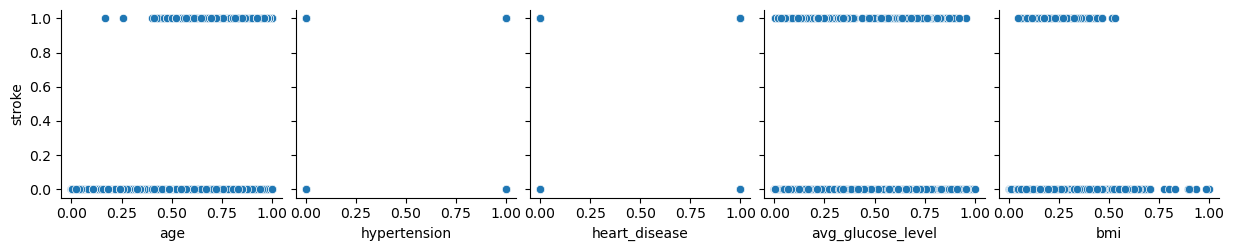

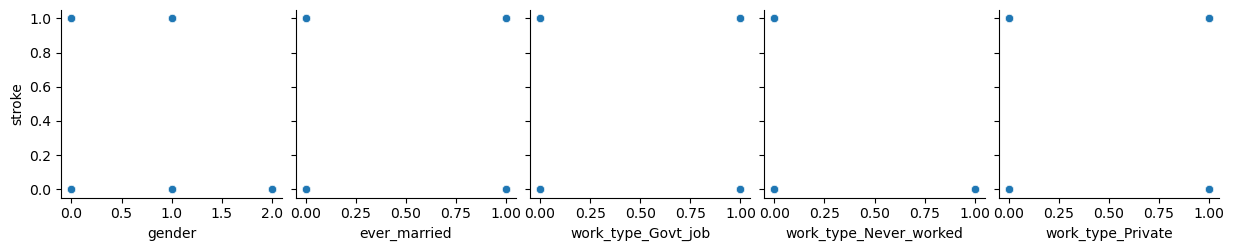

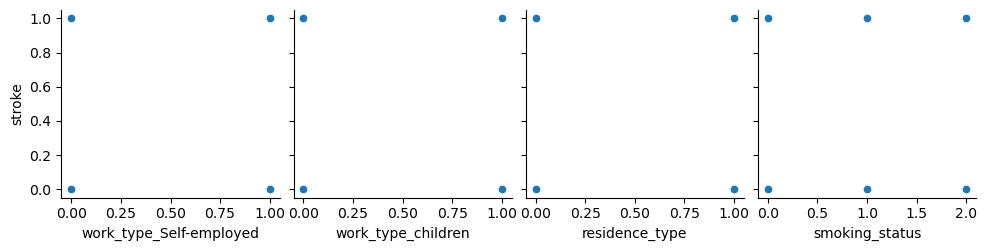

In [97]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']


sns.pairplot(TRAIN, x_vars=X.columns[:5], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[5:10], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[10:], y_vars='stroke')
plt.show()

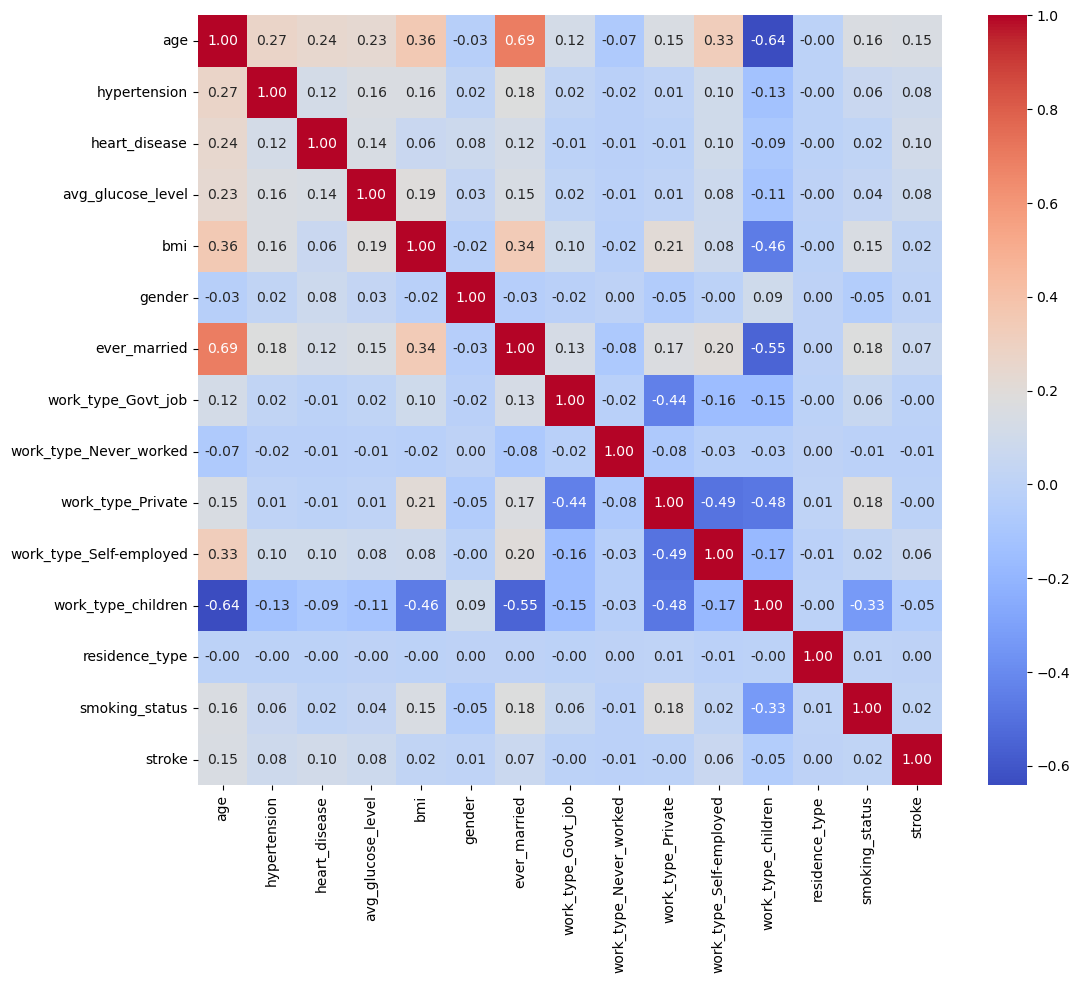

In [98]:
corr = TRAIN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Modeling

In [100]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']

In [101]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

In [103]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2', C=0.01, class_weight='balanced')

log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_f1 = f1_score(y_test, log_reg_pred)
print(log_reg_f1)

0.7917088455049409


### SVM

**UITLEG**

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

In [104]:
rf_model = RandomForestClassifier(max_depth=15, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_pred)
print(rf_f1)

0.9300004797773833


#### Gradient Boosted Decision Trees

#### XGBoost

XGBoost (eXtreme Gradient Boosting) is een krachtig machine learning-algoritme dat goed werkt voor zowel regressie als classificatie. Het combineert meerdere eenvoudige modellen (meestal beslisbomen) om samen een sterk en nauwkeurig model te vormen. XGBoost gebruikt gradient boosting om de fouten steeds verder te verkleinen door het model bij elke stap te verbeteren. Daarbij worden ook technieken toegepast om overfitting te voorkomen, zoals L1- en L2-regularisatie.

XGBoost is snel en efficiënt, kan goed omgaan met grote datasets en heeft een ingebouwde manier om ontbrekende gegevens af te handelen. Het is populair vanwege zijn snelheid, nauwkeurigheid en vermogen om ingewikkelde verbanden tussen kenmerken te verwerken.  
[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)

In [105]:
xgb_model = xgb.XGBClassifier(n_estimators=500, 
                              learning_rate= 0.1, 
                              max_depth=4, 
                              reg_lambda=1, 
                              objective='binary:logistic')

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_f1 = f1_score(y_test, xgb_pred)
print(xgb_f1)

0.9159724364907951


In [33]:
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# param_grid = {
#     'n_estimators': [50, 100, 200, 250, 300],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'reg_lambda': [0, 1],
#     'reg_alpha': [0, 1],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# grid_search = GridSearchCV(estimator=xgb_model, 
#                            param_grid=param_grid, 
#                            scoring='accuracy', 
#                            cv=5,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x00000245B3006870>>
Traceback (most recent call last):
  File "c:\Users\henry_f4yg7pl\anaconda3\Lib\site-packages\xgboost\core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


In [95]:
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(accuracy_score(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}
0.9845556358381503


### Self-assembled ensemble

Een Voting Classifier is een machine learning-techniek die gebruikmaakt van meerdere modellen om samen een betere en nauwkeurigere voorspelling te maken. Dit is een vorm van ensemble learning, waarbij verschillende basismodellen worden gecombineerd om de prestaties van een model te verbeteren. Het idee hierachter is dat door de voorspellingen van verschillende modellen te combineren, we de bias en variatie kunnen verkleinen en zo de nauwkeurigheid kunnen vergroten.

Er zijn twee soorten voting classifiers:

Hard Voting: Hierbij wordt de klasse gekozen die het vaakst door de individuele modellen wordt voorspeld. De klasse met de meeste stemmen wordt de uiteindelijke voorspelling.
Soft Voting: Hierbij worden de waarschijnlijkheden van elke klasse door de modellen gemiddeld. De klasse met de hoogste gemiddelde waarschijnlijkheid wordt dan als eindvoorspelling gekozen.

In plaats van elk model apart te evalueren, gebruikt de Voting Classifier de gecombineerde kracht van meerdere modellen om een robuustere voorspelling te maken.  
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/voting-classifier/)

In [106]:
# Create individual models
log_clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.01, class_weight='balanced')
tree_clf = DecisionTreeClassifier()
svm_clf = svm.SVC(probability=True)  # Use probability=True for soft voting

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svm_clf)
], voting='soft')  # 'hard' for majority voting or 'soft' for weighted voting based on probabilities

# Fit the model
voting_clf.fit(X_train, y_train)

# Make predictions
voting_pred = voting_clf.predict(X_test)

voting_f1 = f1_score(y_test, voting_pred)
print(f'f1-score: {voting_f1}')

f1-score: 0.9287838167194735


## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

In [107]:
def submission(model, file_name='submission'):
    y_pred = model.predict(TEST)
    copy_test = TEST.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

In [108]:
submission(voting_clf, 'voting_clf')

Submission saved to predictions/voting_clf.csv


## Conclusion & Advice

## Sources

[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)